# Libraries


In [27]:
import pandas as pd
pd.set_option('display.max_colwidth',1)
pd.set_option("display.max_columns", None)
import re
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

In [28]:
df_apart_paris=pd.read_csv('df_apart_paris.csv')


C:\Users\khale\AppData\Local\Temp\ipykernel_16684\3650075201.py:1: DtypeWarning: Columns (15,25,27,29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_apart_paris=pd.read_csv('df_apart_paris.csv')


In [29]:
df_apart_paris

,Unnamed: 0,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"571110,00",16.0,NaN,RUE,8627,SAINT GILLES,75003.0,PARIS 03,75,103,NaN,AM,35,NaN,12,NaN,36.0,"49,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,42.0,3.0,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/07/2017,Vente,"1578150,00",66.0,NaN,RUE,5708,DE LISBONNE,75008.0,PARIS 08,75,108,NaN,CO,44,NaN,61,"139,02",62.0,NaN,66.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,135.0,4.0,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"2810880,00",27.0,NaN,RUE,5993,MARBEUF,75008.0,PARIS 08,75,108,NaN,AR,60,NaN,93,"219,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,220.0,6.0,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/07/2017,Vente,"130000,00",9.0,NaN,RUE,4718,DES INNOCENTS,75001.0,PARIS 01,75,101,NaN,AO,81,NaN,114,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,14.0,1.0,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2017,Vente,"485000,00",30.0,NaN,RUE,759,BEAUBOURG,75003.0,PARIS 03,75,103,NaN,AT,78,NaN,4,"50,07",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,38.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203494,203494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,22/06/2022,Vente,"330375,00",10.0,NaN,RUE,1990,DU CHEVALERET,75013.0,PARIS 13,75,113,NaN,CI,17,NaN,22.0,NaN,37.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,40.0,2.0,NaN,NaN,NaN
203495,203495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,29/06/2022,Vente,"2801244,00",3.0,NaN,VLA,4983,JOCELYN,75016.0,PARIS 16,75,116,NaN,EB,7,NaN,313.0,"183,05",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,172.0,6.0,NaN,NaN,NaN
203496,203496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,14/04/2022,Adjudication,"1905000,00",88.0,NaN,AV,1277,DE BRETEUIL,75015.0,PARIS 15,75,115,NaN,CW,50,NaN,105.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,160.0,6.0,NaN,NaN,NaN
203497,203497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,21/06/2022,Vente,"423000,00",43.0,NaN,RUE,3536,DES FAVORITES,75015.0,PARIS 15,75,115,NaN,AC,55,NaN,16.0,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,43.0,2.0,NaN,NaN,NaN


#Cleaning Data

In [30]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df.index)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)
missing_values_assessment(df_apart_paris).sort_values('Manquant %', ascending=False)

Nombre d'observations: 203,499
Nombre de valeurs: 8,953,956
Valeurs manquantes: 4,388,710
Qualité des données: 50.99%
Type de données:
 object     20
float64    18
int64      6 
dtype: int64%


,Manquant,Manquant %,Type
Identifiant local,203499,100.00,float64
Reference document,203499,100.00,float64
1 Articles CGI,203499,100.00,float64
2 Articles CGI,203499,100.00,float64
3 Articles CGI,203499,100.00,float64
4 Articles CGI,203499,100.00,float64
5 Articles CGI,203499,100.00,float64
No Volume,203499,100.00,float64
Code service sages,203499,100.00,float64
Prefixe de section,203499,100.00,float64


In [31]:
initial_length = len(df_apart_paris)
df_apart_paris.drop_duplicates(inplace=True)
print("deleting {} duplicates from data in {}".format(initial_length-len(df_apart_paris),df_apart_paris['Code departement'][0]))

df_apart_paris=df_apart_paris[(df_apart_paris['No disposition']==1)&(df_apart_paris['Nature mutation']=='Vente')]#so we dont risk having other types like "MAISON" and selecting only the sellings


deleting 0 duplicates from data in 75


In [32]:
#drop columns with 100% for missing values    
#drop 'Unnamed: 0','Type local','Code type local','Code departement'
#drop'Commune' it is not needed since we have code commune column already as type int

def drop_columns_rows(df):
    perc = 100.0 # Like N %
    min_count =  int(((100-perc)/100)*len(df) + 1)
    df = df.dropna( axis=1, 
                    thresh=min_count)
    df = df[df['Valeur fonciere'].notna()]
    df = df.drop(['Unnamed: 0', 'Type local','Code type local','Code departement','Commune','B/T/Q','Code voie','Nature mutation'], axis=1)
    return df
df_apart_paris=drop_columns_rows(df_apart_paris)

In [33]:
def clean_data(df):
    for k in df[['Valeur fonciere','1er lot','Surface Carrez du 1er lot','2eme lot','Surface Carrez du 2eme lot','3eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot']]: 
        df[f'{k}'] = df[f'{k}'].replace(',','.', regex=True)
        df[f'{k}'] = df[f'{k}'].replace('[a-zA-Z]+','', regex=True)

    df=df.astype({'Valeur fonciere': 'float64','1er lot':'float64',
               'Surface Carrez du 1er lot':'float64','2eme lot':'float64','Surface Carrez du 2eme lot':'float64',
               '3eme lot':'float64','Surface Carrez du 3eme lot':'float64','Surface Carrez du 4eme lot':'float64','Surface Carrez du 5eme lot':'float64'},errors='ignore')
    
    return df
df_apart_paris=clean_data(df_apart_paris)

In [34]:
def fill_nan_values(df):    
    for k in df:
        if df[f'{k}'].dtypes=='int64' or df[f'{k}'].dtypes=='float64' :
            df[f'{k}'].fillna(0, inplace=True)
        elif df[f'{k}'].dtypes=='object':
            df[f'{k}'].fillna('', inplace=True)
    return df
df_apart_paris=fill_nan_values(df_apart_paris)

# time serie column

In [35]:
#sort data and drop duplicate
df_apart_paris['Date mutation'] = pd.to_datetime(df_apart_paris['Date mutation'], format = '%d/%m/%Y', errors = 'raise')
df_apart_paris = df_apart_paris.sort_values(by='Date mutation', ignore_index=True)

array([[<AxesSubplot:title={'center':'Date mutation'}>]], dtype=object)

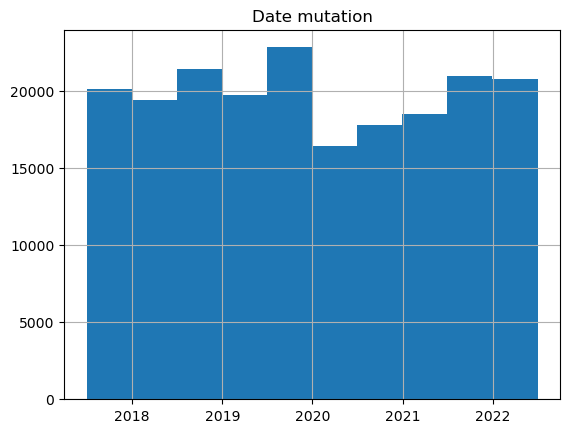

In [36]:
df_apart_paris.hist(column='Date mutation')

In [37]:
def creat_coulmn(df):
    df['year'] = df['Date mutation'].dt.year
    df['month'] = df['Date mutation'].dt.month
    df['converted_seconds'] = df['Date mutation'] - df['Date mutation'][0]
    df['converted_seconds']=df['converted_seconds'].dt.total_seconds()
    return df

#season column
def find_season(month):
    season_month_north = {
            12:'T4', 1:'T1', 2:'T1',
            3:'T1', 4:'T2', 5:'T2',
            6:'T2', 7:'T3', 8:'T3',
            9:'T3', 10:'T4', 11:'T4'}
    return season_month_north.get(month)
def get_season(df):
    season_list = []
    for month in df['month']:
        season = find_season(month)
        season_list.append(season)
    df['Season'] = season_list
    return df
    
    
df_apart_paris=creat_coulmn(df_apart_paris)
df_apart_paris=get_season(df_apart_paris)

In [38]:
df_apart_paris.groupby(['year','Season']).mean()
#in this case we will have a problem of the inflation rate
#as we see in the data the inflation rate in the year 2022 is 5.6% and that is because of the war but in the prices

No disposition  Valeur fonciere    No voie   Code postal  \
year Season                                                             
2017 T3      1.0             9.014787e+05     47.938651  75013.396160   
     T4      1.0             2.892577e+06     47.120731  75013.363198   
2018 T1      1.0             2.717757e+06     48.141903  75013.532659   
     T2      1.0             1.295837e+06     50.323514  75005.531648   
     T3      1.0             1.911673e+07     48.331060  75013.208954   
     T4      1.0             3.142195e+06     47.487928  75013.356036   
2019 T1      1.0             8.872330e+05     48.484868  75013.214474   
     T2      1.0             1.762580e+06     55.533371  75006.188993   
     T3      1.0             1.387814e+06     52.755230  75013.307525   
     T4      1.0             7.446777e+06     51.070744  75013.160976   
2020 T1      1.0             1.146528e+06     50.534817  75013.270434   
     T2      1.0             1.680698e+06     47.393864  75013.226039   
     T3      1.0             1.261575e+06     47.565550  75013.376099   
     T4      1.0             2.597084e+06     48.348811  75013.004674   
2021 T1      1.0             1.330322e+06     47.279787  75013.398354   
     T2      1.0             1.180898e+06     53.088842  75013.335036   
     T3      1.0             1.383165e+06     47.112757  75006.180710   
     T4      1.0             2.096298e+06     49.828408  75013.121676   
2022 T1      1.0             1.822646e+06     48.664921  75013.180685   
     T2      1.0             1.491692e+06     47.561462  75013.349097   

             Code commune    No plan     1er lot  Surface Carrez du 1er lot  \
year Season                                                                   
2017 T3      113.396160    48.836140  185.194387  33.055068                   
     T4      113.363198    50.341703  163.820209  29.364945                   
2018 T1      113.532659    48.977880  143.985288  27.668728                   
     T2      113.177658    50.436449  146.914280  30.772449                   
     T3      113.208954    49.730522  153.893073  28.283193                   
     T4      113.356036    50.073063  158.252613  25.954918                   
2019 T1      113.214474    50.806140  147.462281  29.785730                   
     T2      113.270556    48.442651  154.797508  27.270684                   
     T3      113.307525    49.034773  140.889523  28.160601                   
     T4      113.160976    48.900680  121.239581  24.784618                   
2020 T1      113.270434    50.071461  124.610616  27.263929                   
     T2      113.226039    49.367248  157.519470  28.758390                   
     T3      113.376099    49.927634  125.240668  26.640420                   
     T4      113.004674    52.071225  137.075086  26.770887                   
2021 T1      113.398354    49.814905  138.522485  26.907996                   
     T2      113.335036    50.454928  146.476963  28.348735                   
     T3      113.211079    49.936639  128.826507  27.735751                   
     T4      113.121676    51.220816  138.517940  25.816694                   
2022 T1      113.180685    49.781712  144.489473  28.772893                   
     T2      113.349097    50.946480  134.724910  28.270174                   

               2eme lot  Surface Carrez du 2eme lot   3eme lot  \
year Season                                                      
2017 T3      140.100246  11.498102                   8.107829    
     T4      126.036360  9.680915                    13.234733   
2018 T1      112.547892  9.294934                    11.834412   
     T2      123.617470  10.136641                   8.195393    
     T3      113.304832  10.183871                   5.657220    
     T4      115.985495  8.619084                    17.346036   
2019 T1      108.399123  9.826364                    7.180811    
     T2      107.578873  9.241908                    8.713396    
     T3

In [39]:
df_apart_paris

,No disposition,Date mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,year,month,converted_seconds,Season
0,1,2017-07-01,667000.0,93.0,AV,EMILE ZOLA,75015.0,115,DV,82,188.0,0.00,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,68.0,3.0,,,0.0,2017,7,0.0,T3
1,1,2017-07-01,2010000.0,10.0,RUE,SAINT MERRI,75004.0,104,AG,113,8.0,145.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,120.0,4.0,,,0.0,2017,7,0.0,T3
2,1,2017-07-01,190000.0,40.0,RUE,SAINT SEBASTIEN,75011.0,111,BD,39,29.0,25.42,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,37.0,1.0,,,0.0,2017,7,0.0,T3
3,1,2017-07-01,351788.0,69.0,RUE,NOLLET,75017.0,117,CP,82,21.0,35.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,35.0,2.0,,,0.0,2017,7,0.0,T3
4,1,2017-07-02,325000.0,56.0,AV,EMILE ZOLA,75015.0,115,GH,4,318.0,0.00,413.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,47.0,1.0,,,0.0,2017,7,86400.0,T3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198082,1,2022-06-30,2150000.0,35.0,AV,BUGEAUD,75016.0,116,DY,3,119.0,0.00,120.0,0.0,21.0,0.0,22.0,0.0,0.0,0.0,4,177.0,7.0,,,0.0,2022,6,157680000.0,T2
198083,1,2022-06-30,790000.0,18.0,RUE,PIERRE LESCOT,75001.0,101,AQ,148,37.0,63.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,62.0,3.0,,,0.0,2022,6,157680000.0,T2
198084,1,2022-06-30,240000.0,60.0,RUE,RAMEY,75018.0,118,BJ,16,36.0,25.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,35.0,2.0,,,0.0,2022,6,157680000.0,T2
198085,1,2022-06-30,150222.0,83.0,RUE,OLIVIER DE SERRES,75015.0,115,AN,14,34.0,12.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.0,1.0,,,0.0,2022,6,157680000.0,T2


# Business Rules

In [40]:
def Business_Rules(df):
    #creat new column price/m^2
    df['price_in_m_2']=df['Valeur fonciere'].div(df['Surface reelle bati'].values)
    #Supprimer lestransactions des biensayant une superficieinférieure à 9 m²
    df=df[(df['Surface reelle bati']>=9)]
    #Supprimer lestransactions «symboliques » avec unprix du m² 
    #inférieureau prix du m² minimalsur Tremplinprix m² min Tremplin ~16 euro (T3 2019)
    df=df[(df['price_in_m_2']>=16)]
    #Supprimer lestransactions des biens“prestigieux”
    #: avec unprix du m² supérieur auprix du m² max surTremplinprix m² max Tremplin ~29 752 euro (T3 2017)
    df=df[(df['price_in_m_2']<=29752)]
    df['surface_des_lots']=df['Surface Carrez du 1er lot']+df['Surface Carrez du 2eme lot']+df['Surface Carrez du 3eme lot']+df['Surface Carrez du 4eme lot']+df['Surface Carrez du 5eme lot']
    df=df.drop(columns=['Surface Carrez du 1er lot','Surface Carrez du 2eme lot','Surface Carrez du 3eme lot','Surface Carrez du 4eme lot','Surface Carrez du 5eme lot'],axis=1)
    return df
df_apart_paris=Business_Rules(df_apart_paris)

In [15]:
'1er lot','2eme lot','3eme lot','4eme lot','5eme lot'

('1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot')

## Create a column with: Rescaled price with the inflation rate

In [41]:
#rescale the prices column to the prices in third term 2022
def rescale_price(df):
    df['Valeur_fonciere_scaled']=np.nan
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2017), df['Valeur fonciere']*1.256580117, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2017), df['Valeur fonciere']*1.2410327, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2018), df['Valeur fonciere']*1.22989, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2018), df['Valeur fonciere']*1.2233757, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2018), df['Valeur fonciere']*1.21526, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2018), df['Valeur fonciere']*1.200225, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2019), df['Valeur fonciere']*1.1848, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2019), df['Valeur fonciere']*1.17293, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2019), df['Valeur fonciere']*1.168520418, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2019), df['Valeur fonciere']*1.13981, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2020), df['Valeur fonciere']*1.1136017, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2020), df['Valeur fonciere']*1.096205, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T3')&(df['year']==2020), df['Valeur fonciere']*1.096173, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2020), df['Valeur fonciere']*1.071254, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2021), df['Valeur fonciere']*1.059564, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2021), df['Valeur fonciere']*1.045, inplace=True)
    df['Valeur_fonciere_scaled'
      ].mask((df['Season'] == 'T3')&(df['year']==2021), df['Valeur fonciere']*1.041, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T4')&(df['year']==2021), df['Valeur fonciere']*1.02414, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T1')&(df['year']==2022), df['Valeur fonciere']*1.012, inplace=True)
    df['Valeur_fonciere_scaled'].mask((df['Season'] == 'T2')&(df['year']==2022), df['Valeur fonciere'], inplace=True)
    return df
df_apart_paris=rescale_price(df_apart_paris)

In [42]:
df_apart_paris

,No disposition,Date mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,2eme lot,3eme lot,4eme lot,5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,year,month,converted_seconds,Season,price_in_m_2,surface_des_lots,Valeur_fonciere_scaled
0,1,2017-07-01,667000.0,93.0,AV,EMILE ZOLA,75015.0,115,DV,82,188.0,56.0,0.0,0.0,0.0,2,68.0,3.0,,,0.0,2017,7,0.0,T3,9808.823529,0.00,8.381389e+05
1,1,2017-07-01,2010000.0,10.0,RUE,SAINT MERRI,75004.0,104,AG,113,8.0,0.0,0.0,0.0,0.0,1,120.0,4.0,,,0.0,2017,7,0.0,T3,16750.000000,145.66,2.525726e+06
2,1,2017-07-01,190000.0,40.0,RUE,SAINT SEBASTIEN,75011.0,111,BD,39,29.0,30.0,0.0,0.0,0.0,2,37.0,1.0,,,0.0,2017,7,0.0,T3,5135.135135,25.42,2.387502e+05
3,1,2017-07-01,351788.0,69.0,RUE,NOLLET,75017.0,117,CP,82,21.0,0.0,0.0,0.0,0.0,1,35.0,2.0,,,0.0,2017,7,0.0,T3,10051.085714,35.05,4.420498e+05
4,1,2017-07-02,325000.0,56.0,AV,EMILE ZOLA,75015.0,115,GH,4,318.0,413.0,0.0,0.0,0.0,2,47.0,1.0,,,0.0,2017,7,86400.0,T3,6914.893617,0.00,4.083885e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198082,1,2022-06-30,2150000.0,35.0,AV,BUGEAUD,75016.0,116,DY,3,119.0,120.0,21.0,22.0,0.0,4,177.0,7.0,,,0.0,2022,6,157680000.0,T2,12146.892655,0.00,2.150000e+06
198083,1,2022-06-30,790000.0,18.0,RUE,PIERRE LESCOT,75001.0,101,AQ,148,37.0,0.0,0.0,0.0,0.0,1,62.0,3.0,,,0.0,2022,6,157680000.0,T2,12741.935484,63.11,7.900000e+05
198084,1,2022-06-30,240000.0,60.0,RUE,RAMEY,75018.0,118,BJ,16,36.0,0.0,0.0,0.0,0.0,1,35.0,2.0,,,0.0,2022,6,157680000.0,T2,6857.142857,25.69,2.400000e+05
198085,1,2022-06-30,150222.0,83.0,RUE,OLIVIER DE SERRES,75015.0,115,AN,14,34.0,0.0,0.0,0.0,0.0,1,13.0,1.0,,,0.0,2022,6,157680000.0,T2,11555.538462,12.97,1.502220e+05


# ecode categorical columns:

In [43]:
def encode_ctg(df):
    categorical_features_not_encoded=['No voie','Type de voie','Voie','Section','Nature culture','Nature culture speciale','Season']
    #5,392,25,3388,185,2,1,4
    enc = OrdinalEncoder()
    for k in categorical_features_not_encoded:
        df_apart_paris[[f'{k}']]=enc.fit_transform(df_apart_paris[[f'{k}']])
    return df
    
df_apart_paris=encode_ctg(df_apart_paris)

In [44]:
df_apart_paris.dtypes

No disposition               int64         
Date mutation                datetime64[ns]
Valeur fonciere              float64       
No voie                      float64       
Type de voie                 float64       
Voie                         float64       
Code postal                  float64       
Code commune                 int64         
Section                      float64       
No plan                      int64         
1er lot                      float64       
2eme lot                     float64       
3eme lot                     float64       
4eme lot                     float64       
5eme lot                     float64       
Nombre de lots               int64         
Surface reelle bati          float64       
Nombre pieces principales    float64       
Nature culture               float64       
Nature culture speciale      float64       
Surface terrain              float64       
year                         int64         
month                        int

In [45]:
df_apart_paris=df_apart_paris.drop(labels=['No disposition','Nature culture speciale'],axis=1)
df_apart_paris

,Date mutation,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,2eme lot,3eme lot,4eme lot,5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,year,month,converted_seconds,Season,price_in_m_2,surface_des_lots,Valeur_fonciere_scaled
0,2017-07-01,667000.0,93.0,2.0,1902.0,75015.0,115,99.0,82,188.0,56.0,0.0,0.0,0.0,2,68.0,3.0,0.0,0.0,2017,7,0.0,2.0,9808.823529,0.00,8.381389e+05
1,2017-07-01,2010000.0,10.0,18.0,3089.0,75004.0,104,6.0,113,8.0,0.0,0.0,0.0,0.0,1,120.0,4.0,0.0,0.0,2017,7,0.0,2.0,16750.000000,145.66,2.525726e+06
2,2017-07-01,190000.0,40.0,18.0,3102.0,75011.0,111,29.0,39,29.0,30.0,0.0,0.0,0.0,2,37.0,1.0,0.0,0.0,2017,7,0.0,2.0,5135.135135,25.42,2.387502e+05
3,2017-07-01,351788.0,69.0,18.0,2743.0,75017.0,117,67.0,82,21.0,0.0,0.0,0.0,0.0,1,35.0,2.0,0.0,0.0,2017,7,0.0,2.0,10051.085714,35.05,4.420498e+05
4,2017-07-02,325000.0,56.0,2.0,1902.0,75015.0,115,154.0,4,318.0,413.0,0.0,0.0,0.0,2,47.0,1.0,0.0,0.0,2017,7,86400.0,2.0,6914.893617,0.00,4.083885e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198082,2022-06-30,2150000.0,35.0,2.0,304.0,75016.0,116,102.0,3,119.0,120.0,21.0,22.0,0.0,4,177.0,7.0,0.0,0.0,2022,6,157680000.0,1.0,12146.892655,0.00,2.150000e+06
198083,2022-06-30,790000.0,18.0,18.0,2888.0,75001.0,101,16.0,148,37.0,0.0,0.0,0.0,0.0,1,62.0,3.0,0.0,0.0,2022,6,157680000.0,1.0,12741.935484,63.11,7.900000e+05
198084,2022-06-30,240000.0,60.0,18.0,2955.0,75018.0,118,35.0,16,36.0,0.0,0.0,0.0,0.0,1,35.0,2.0,0.0,0.0,2022,6,157680000.0,1.0,6857.142857,25.69,2.400000e+05
198085,2022-06-30,150222.0,83.0,18.0,2760.0,75015.0,115,13.0,14,34.0,0.0,0.0,0.0,0.0,1,13.0,1.0,0.0,0.0,2022,6,157680000.0,1.0,11555.538462,12.97,1.502220e+05


In [50]:
df_apart_paris[['Valeur fonciere','Code postal','Nombre de lots','Surface reelle bati','year','Season','Nombre pieces principales']].to_csv('expl_df')

,Valeur fonciere,Code postal,Nombre de lots,Surface reelle bati,year,Season,Nombre pieces principales
0,667000.0,75015.0,2,68.0,2017,2.0,3.0
1,2010000.0,75004.0,1,120.0,2017,2.0,4.0
2,190000.0,75011.0,2,37.0,2017,2.0,1.0
3,351788.0,75017.0,1,35.0,2017,2.0,2.0
4,325000.0,75015.0,2,47.0,2017,2.0,1.0
...,...,...,...,...,...,...,...
198082,2150000.0,75016.0,4,177.0,2022,1.0,7.0
198083,790000.0,75001.0,1,62.0,2022,1.0,3.0
198084,240000.0,75018.0,1,35.0,2022,1.0,2.0
198085,150222.0,75015.0,1,13.0,2022,1.0,1.0


# Correlation

high correlation btw the surface,number of pieces and the price.
high correlation btw the surface and the number of pieces.



In [46]:
corr = df_apart_paris.corr()
corr.style.background_gradient(cmap='coolwarm')

,Valeur fonciere,No voie,Type de voie,Voie,Code postal,Code commune,Section,No plan,1er lot,2eme lot,3eme lot,4eme lot,5eme lot,Nombre de lots,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,year,month,converted_seconds,Season,price_in_m_2,surface_des_lots,Valeur_fonciere_scaled
Valeur fonciere,1.000000,-0.031980,-0.119778,0.022696,-0.009918,-0.128604,0.017598,-0.050735,-0.003960,0.011077,0.047697,0.041835,0.036033,0.236363,0.832766,0.689641,0.017570,0.013121,0.057159,-0.005425,0.058544,-0.005100,0.454557,0.464580,0.994504
No voie,-0.031980,1.000000,-0.130074,-0.002974,0.001490,0.030902,-0.010060,-0.045013,0.006133,0.018720,0.001261,-0.001736,0.000323,-0.005854,-0.006816,0.000970,0.004333,0.007002,-0.002531,-0.001668,-0.002934,-0.000100,-0.061854,-0.004109,-0.032133
Type de voie,-0.119778,-0.130074,1.000000,-0.051296,-0.001795,-0.026599,-0.051072,0.096256,-0.043855,-0.069884,-0.011559,-0.004137,-0.002981,-0.016702,-0.147265,-0.115946,0.021734,0.011879,-0.001519,0.000676,-0.001544,-0.000082,0.001499,-0.070610,-0.119883
Voie,0.022696,-0.002974,-0.051296,1.000000,0.001554,-0.015433,-0.048609,0.026081,-0.015976,-0.013979,-0.004400,0.000730,0.000285,-0.000243,0.019738,0.014745,-0.026989,-0.036908,-0.002134,0.004575,-0.001359,0.004107,0.018623,0.016012,0.022547
Code postal,-0.009918,0.001490,-0.001795,0.001554,1.000000,0.016339,0.005043,0.003730,0.000611,0.001434,0.000287,0.000112,0.000039,0.001866,-0.004684,-0.004301,0.000820,0.000583,0.000347,-0.000116,0.000327,0.000711,-0.005531,-0.001589,-0.009239
Code commune,-0.128604,0.030902,-0.026599,-0.015433,0.016339,1.000000,0.348793,0.005071,0.017386,0.059295,0.000652,-0.003794,-0.004625,0.009538,-0.048303,-0.019884,0.027275,0.017024,-0.002868,-0.005518,-0.004066,-0.003907,-0.210675,0.005740,-0.128757
Section,0.017598,-0.010060,-0.051072,-0.048609,0.005043,0.348793,1.000000,-0.042899,0.016209,0.027734,-0.003651,0.000165,-0.001564,0.010159,0.049218,0.037346,-0.023921,-0.026335,-0.000075,0.000224,0.000003,0.000543,-0.052214,0.028652,0.017618
No plan,-0.050735,-0.045013,0.096256,0.026081,0.003730,0.005071,-0.042899,1.000000,-0.015435,-0.022726,-0.005299,0.000028,0.001192,-0.007586,-0.073201,-0.055855,-0.003824,-0.020979,-0.001583,0.005685,-0.000633,0.004589,0.019451,-0.029335,-0.051116
1er lot,-0.003960,0.006133,-0.043855,-0.015976,0.000611,0.017386,0.016209,-0.015435,1.000000,0.548091,0.119374,0.055422,0.029898,0.020227,0.009731,-0.007026,-0.015126,-0.012124,-0.007505,-0.000632,-0.007901,0.000943,-0.027370,0.004115,-0.003633
2eme lot,0.011077,0.018720,-0.069884,-0.013979,0.001434,0.059295,0.027734,-0.022726,0.548091,1.000000,0.183736,0.092996,0.050397,0.099083,0.037708,0.022270,-0.018569,-0.014881,-0.007026,-0.002400,-0.007721,-0.000908,-0.044559,0.023613,0.011419


In [47]:
corr[['price_in_m_2','Valeur_fonciere_scaled']]

,price_in_m_2,Valeur_fonciere_scaled
Valeur fonciere,0.454557,0.994504
No voie,-0.061854,-0.032133
Type de voie,0.001499,-0.119883
Voie,0.018623,0.022547
Code postal,-0.005531,-0.009239
Code commune,-0.210675,-0.128757
Section,-0.052214,0.017618
No plan,0.019451,-0.051116
1er lot,-0.027370,-0.003633
2eme lot,-0.044559,0.011419


In [48]:
corr[['Valeur fonciere','converted_seconds']]

,Valeur fonciere,converted_seconds
Valeur fonciere,1.000000,0.058544
No voie,-0.031980,-0.002934
Type de voie,-0.119778,-0.001544
Voie,0.022696,-0.001359
Code postal,-0.009918,0.000327
Code commune,-0.128604,-0.004066
Section,0.017598,0.000003
No plan,-0.050735,-0.000633
1er lot,-0.003960,-0.007901
2eme lot,0.011077,-0.007721


__1st methode: inflation rate__ 

In [24]:
# Splitting the dataset into training and testing set (80/20)
X, X_test, y, y_test = train_test_split(df_apart_paris[['Surface reelle bati','Code postal']] , df_apart_paris['Valeur_fonciere_scaled'], test_size = 0.1, random_state = 28)
# Splitting the dataset into training and testing set (80/20)
X_train, X_valid, y_train, y_validation = train_test_split(X,y, test_size = 0.2, random_state = 28)

In [28]:
#random forest

# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators=20, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(X, y) 

# Predicting the target values of the test set
y_pred = model.predict(X_test)
y_pred_train=model.predict(X)
#scoring
score = r2_score(y_test, y_pred)
score_train=r2_score(y, y_pred_train)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
explained_variance_scor=explained_variance_score(y_test, y_pred)
max_err=max_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mae_train=mean_absolute_error(y, y_pred_train)

#print("RMSE:",rmse)
print("score: ",score)
#print("explained_variance_scor: ",explained_variance_scor)
print("mae:",mae)
#print("the maximum error is:",max_err)
print("score train: ",score_train)
print("mae train:",mae_train)
print("variance training is: ",np.var(y_pred_train))
print("variance testing is: ",np.var(y_pred))

score:  0.7027860853445034
mae: 157562.33119078146
score train:  0.7869186724352512
mae train: 150522.1238428711
variance training is:  313434142457.6437
variance testing is:  312346260145.89624


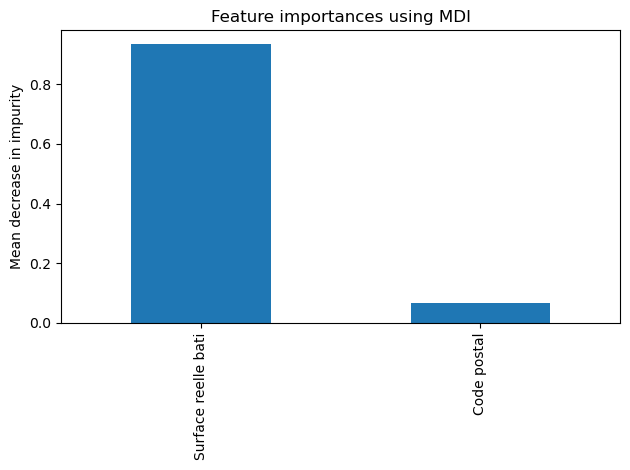

In [26]:
importances= model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
residuals=y_pred-y_test

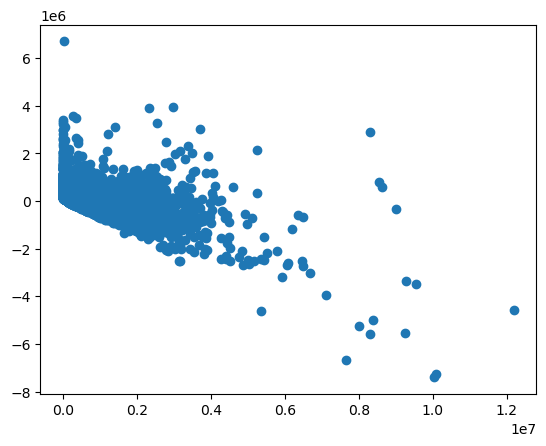

In [28]:
plt.scatter(y_test,residuals)

the predictions are getting bad with the price getting high!
we can see that we have some noisy data where the price is too high where the price is too high, we should go back to
the data and fix this.


# Pickling The Model file For Deployment

In [2]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))


In [3]:
pickled_model=pickle.load(open('model.pkl','rb'))


C:\Users\khale\anaconda3\envs\house_prediction\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\khale\anaconda3\envs\house_prediction\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
request={
    "data":{
    "Surface reelle bati":20,
    "Code postal":75101.0
    }
}

In [9]:
pd.json_normalize(request['data'])

,Surface reelle bati,Code postal
0,20,75101.0


In [10]:
pickled_model.predict(pd.json_normalize(request['data']))


array([208780.99203308])

In [34]:
pickled_model.predict(np.array(list(request['data'].values())).reshape(1,-1))[0]

C:\Users\khale\anaconda3\envs\house_prediction\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


288682.3486531472

In [31]:
importances= model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

NameError: name 'X' is not defined

Stacking is a machine learning ensemble technique that involves combining the predictions from multiple models to improve the overall performance of the model. In stacking, the predictions from multiple models are combined using a meta-model, which learns to weigh the predictions from each model to produce a final prediction.

The basic idea of stacking is to train several models using the same training data, but each model may have a different algorithm, hyperparameters, or features. Then, the predictions from these models are used as input features to a meta-model, which is trained on a validation set. The meta-model learns to combine the predictions from each model in a way that optimizes the performance on the validation set. Once the meta-model is trained, it can be used to make predictions on new data.

The benefits of stacking are that it can improve the performance of the model by combining the strengths of multiple models, and it can reduce the risk of overfitting by using a separate validation set to train the meta-model. However, stacking can also be computationally expensive, and it requires careful tuning of the models and the meta-model to optimize the performance.

Stacking can be used in a variety of machine learning problems, such as regression, classification, and ranking. It is often used in competitions and real-world applications where high accuracy is required.